In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#### Read data and divide in X and y

In [63]:
df = pd.read_csv("data/audit/audit_risk.csv")
df_test = pd.read_csv("data/audit/trial.csv")
df.head(5)

Sector_score LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  Risk_B  \
0          3.89          23    4.18      0.6   2.508    2.50      0.2   0.500   
1          3.89           6    0.00      0.2   0.000    4.83      0.2   0.966   
2          3.89           6    0.51      0.2   0.102    0.23      0.2   0.046   
3          3.89           6    0.00      0.2   0.000   10.80      0.6   6.480   
4          3.89           6    0.00      0.2   0.000    0.08      0.2   0.016   

   TOTAL  numbers  ...  RiSk_E  History  Prob  Risk_F  Score  Inherent_Risk  \
0   6.68      5.0  ...     0.4        0   0.2     0.0    2.4          8.574   
1   4.83      5.0  ...     0.4        0   0.2     0.0    2.0          2.554   
2   0.74      5.0  ...     0.4        0   0.2     0.0    2.0          1.548   
3  10.80      6.0  ...     0.4        0   0.2     0.0    4.4         17.530   
4   0.08      5.0  ...     0.4        0   0.2     0.0    2.0          1.416   

   CONTROL_RISK  Detection_Risk  Audit_Risk  Risk  
0           0.4             0.5      1.7148     1  
1           0.4             0.5      0.5108     0  
2           0.4             0.5      0.3096     0  
3           0.4             0.5      3.5060     1  
4           0.4             0.5      0.2832     0  

[5 rows x 27 columns]

#### Look for any missing data - either NaN or ? as mentionned in data description

In [64]:
df = df.replace("?", np.nan)
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [65]:
df_test = df_test.replace(" ?", np.nan)
df_test.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

#### Drop those rows

In [66]:
df = df.dropna()
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [67]:
df_test = df_test.dropna()
df_test.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      0
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

#### Divide into X and y

In [68]:
X_train = df.drop(columns = "Risk")
y_train = df["Risk"]
X_test = df_test.drop(columns = "Risk")
y_test = df_test["Risk"]

In [69]:
X_train.describe()

Sector_score      PARA_A     Score_A      Risk_A       PARA_B  \
count    775.000000  775.000000  775.000000  775.000000   775.000000   
mean      20.138877    2.453059    0.351484    1.352712    10.813924   
std       24.301417    5.681977    0.174082    3.442348    50.114461   
min        1.850000    0.000000    0.200000    0.000000     0.000000   
25%        2.370000    0.210000    0.200000    0.042000     0.000000   
50%        3.890000    0.880000    0.200000    0.176000     0.410000   
75%       55.570000    2.480000    0.600000    1.488000     4.160000   
max       59.850000   85.000000    0.600000   51.000000  1264.630000   

          Score_B      Risk_B        TOTAL     numbers   Score_B.1  ...  \
count  775.000000  775.000000   775.000000  775.000000  775.000000  ...   
mean     0.313290    6.342181    13.235241    5.067742    0.223742  ...   
std      0.169865   30.091403    51.343841    0.264608    0.080399  ...   
min      0.200000    0.000000     0.000000    5.000000    0.200000  ...   
25%      0.200000    0.000000     0.540000    5.000000    0.200000  ...   
50%      0.200000    0.082000     1.370000    5.000000    0.200000  ...   
75%      0.400000    1.887000     7.725000    5.000000    0.200000  ...   
max      0.600000  758.778000  1268.910000    9.000000    0.600000  ...   

             PROB      RiSk_E     History        Prob      Risk_F       Score  \
count  775.000000  775.000000  775.000000  775.000000  775.000000  775.000000   
mean     0.206194    0.519226    0.104516    0.216774    0.053677    2.703484   
std      0.037532    0.290468    0.531360    0.068028    0.306027    0.859106   
min      0.200000    0.400000    0.000000    0.200000    0.000000    2.000000   
25%      0.200000    0.400000    0.000000    0.200000    0.000000    2.000000   
50%      0.200000    0.400000    0.000000    0.200000    0.000000    2.400000   
75%      0.200000    0.400000    0.000000    0.200000    0.000000    3.300000   
max      0.600000    2.400000    9.000000    0.600000    5.400000    5.200000   

       Inherent_Risk  CONTROL_RISK  Detection_Risk  Audit_Risk  
count     775.000000    775.000000           775.0  775.000000  
mean       17.701560      0.572903             0.5    7.177034  
std        54.772482      0.444825             0.0   38.691674  
min         1.400000      0.400000             0.5    0.280000  
25%         1.584000      0.400000             0.5    0.316800  
50%         2.214000      0.400000             0.5    0.556000  
75%        10.703000      0.400000             0.5    3.252600  
max       801.262000      5.800000             0.5  961.514400  

[8 rows x 25 columns]

#### Some data visualization to understand the data better

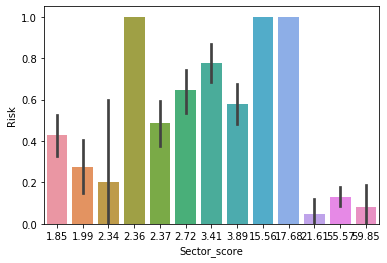

In [70]:
sns.barplot(x=X_train["Sector_score"][:5000], y=y_train[:5000])

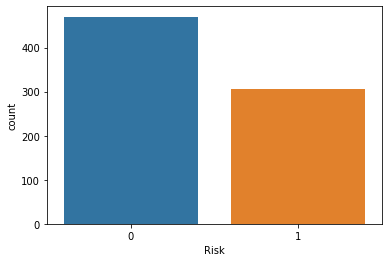

In [71]:
sns.countplot(x="Risk", data=df)

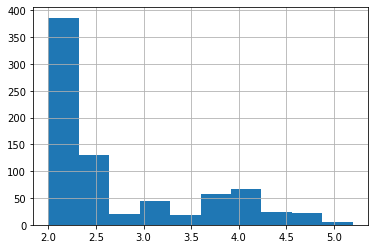

In [72]:
df["Score"].hist()

In [73]:
df.corr()

Sector_score    PARA_A   Score_A    Risk_A    PARA_B  \
Sector_score        1.000000 -0.216406 -0.424352 -0.218631 -0.132450   
PARA_A             -0.216406  1.000000  0.496532  0.999267  0.161852   
Score_A            -0.424352  0.496532  1.000000  0.504746  0.249325   
Risk_A             -0.218631  0.999267  0.504746  1.000000  0.165202   
PARA_B             -0.132450  0.161852  0.249325  0.165202  1.000000   
Score_B            -0.218075  0.358352  0.572351  0.362783  0.347493   
Risk_B             -0.130376  0.161748  0.248079  0.165060  0.999936   
TOTAL              -0.153056  0.266952  0.297420  0.270135  0.994101   
numbers            -0.151573  0.133676  0.242533  0.135506  0.209799   
Score_B.1          -0.170092  0.140521  0.274412  0.142979  0.230789   
Risk_C             -0.166165  0.140333  0.265807  0.142590  0.222993   
Money_Value        -0.117589  0.449318  0.206131  0.448703  0.125033   
Score_MV           -0.318342  0.285791  0.478570  0.290560  0.314464   
Risk_D             -0.115937  0.448507  0.203551  0.447866  0.124620   
District_Loss      -0.107588  0.127622  0.088253  0.127196  0.082841   
PROB               -0.086560  0.043629  0.093510  0.043659  0.042507   
RiSk_E             -0.127964  0.118758  0.102278  0.118463  0.079290   
History            -0.114588  0.118195  0.177802  0.121050  0.203539   
Prob               -0.136629  0.172534  0.265185  0.176061  0.316494   
Risk_F             -0.103036  0.103904  0.150805  0.106487  0.196009   
Score              -0.336394  0.426472  0.720233  0.432332  0.397111   
Inherent_Risk      -0.172967  0.481784  0.320762  0.483218  0.654427   
CONTROL_RISK       -0.154446  0.149032  0.170536  0.150616  0.186625   
Detection_Risk           NaN       NaN       NaN       NaN       NaN   
Audit_Risk         -0.091747  0.219695  0.201750  0.221519  0.887789   
Risk               -0.393322  0.378547  0.619383  0.384869  0.256920   

                 Score_B    Risk_B     TOTAL   numbers  Score_B.1  ...  \
Sector_score   -0.218075 -0.130376 -0.153056 -0.151573  -0.170092  ...   
PARA_A          0.358352  0.161748  0.266952  0.133676   0.140521  ...   
Score_A         0.572351  0.248079  0.297420  0.242533   0.274412  ...   
Risk_A          0.362783  0.165060  0.270135  0.135506   0.142979  ...   
PARA_B          0.347493  0.999936  0.994101  0.209799   0.230789  ...   
Score_B         1.000000  0.348081  0.379242  0.277447   0.313651  ...   
Risk_B          0.348081  1.000000  0.994023  0.209541   0.230486  ...   
TOTAL           0.379242  0.994023  1.000000  0.217576   0.238164  ...   
numbers         0.277447  0.209541  0.217576  1.000000   0.908132  ...   
Score_B.1       0.313651  0.230486  0.238164  0.908132   1.000000  ...   
Risk_C          0.302867  0.222683  0.230626  0.955300   0.990411  ...   
Money_Value     0.205139  0.125069  0.168669  0.186188   0.220348  ...   
Score_MV        0.567383  0.313008  0.337366  0.446590   0.507166  ...   
Risk_D          0.202059  0.124667  0.168176  0.186513   0.220581  ...   
District_Loss  -0.005010  0.083029  0.093221  0.124893   0.150237  ...   
PROB            0.092453  0.042833  0.046419  0.035755   0.036839  ...   
RiSk_E          0.014977  0.079630  0.089083  0.136841   0.157464  ...   
History         0.200734  0.202780  0.210702  0.202276   0.226121  ...   
Prob            0.309393  0.316329  0.326342  0.209534   0.248353  ...   
Risk_F          0.171172  0.195254  0.202114  0.202340   0.223293  ...   
Score           0.901220  0.396908  0.433766  0.502795   0.565941  ...   
Inherent_Risk   0.365532  0.654480  0.689743  0.271044   0.308465  ...   
CONTROL_RISK    0.127542  0.186327  0.197219  0.228560   0.256442  ...   
Detection_Risk       NaN       NaN       NaN       NaN        NaN  ...   
Audit_Risk      0.207886  0.887565  0.888093  0.221416   0.259689  ...   
Risk            0.635524  0.255181  0.291893  0.308017   0.353664  ...   

                  RiSk_E   History      Prob    Risk_F     Score  \
Sect

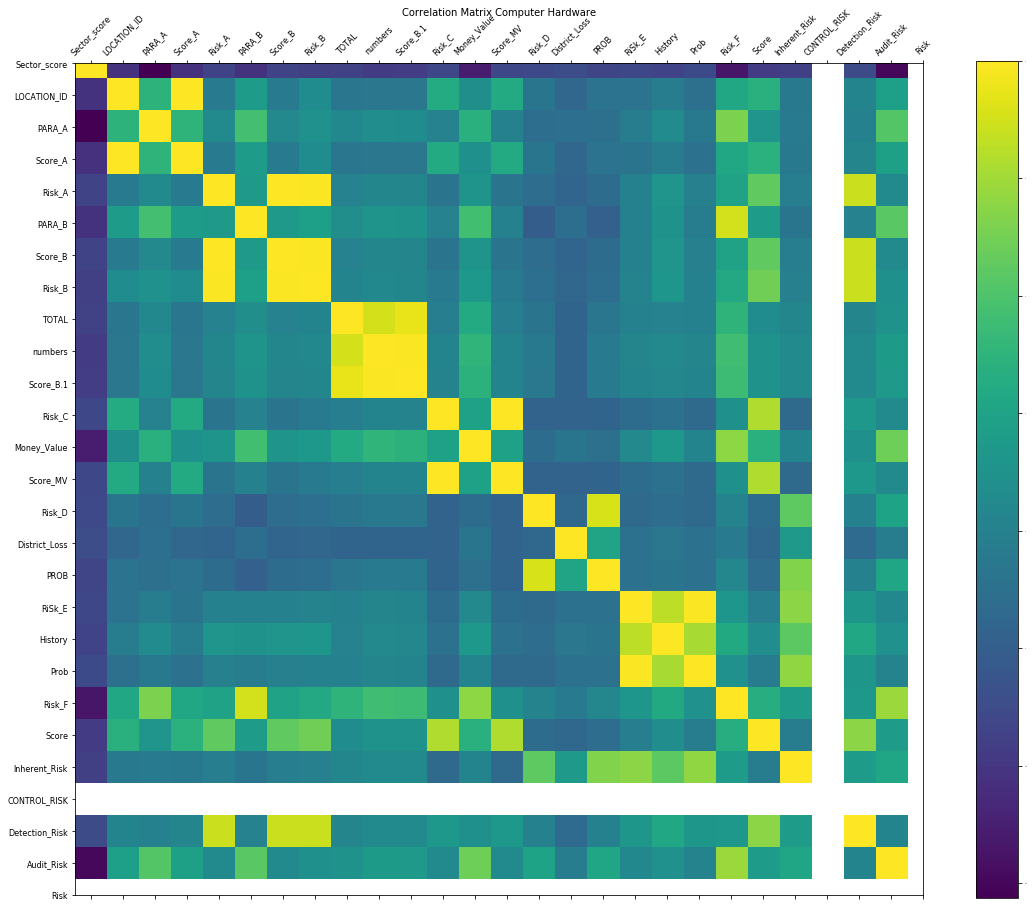

In [74]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=8, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=0)
plt.title('Correlation Matrix Computer Hardware', fontsize=10);

## Training model + testing

##### Preparing data for training and testing by adding a column of 1's and transforming to numpy array

In [75]:
X_train = X_train.drop(columns = "LOCATION_ID")
X_test = X_test.drop(columns = "LOCATION_ID")

X_train_clean = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test_clean = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

### Running K-Fold-Validation

In [76]:
import k_fold_validation_V2 as k2 # this one uses iterations as termination criteria

In [77]:
k2.k_fold_validation(X_train_clean, y_train, 0.2, 2000, 0)

0.8993548387096773

0.9045161290322582


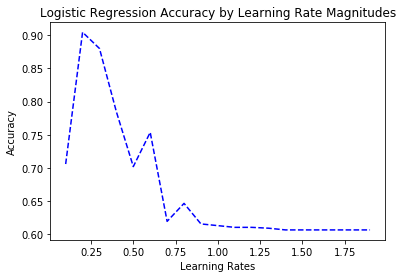

In [78]:
learn_vals = []
accuracies = []
max_acc = 0
for x in np.arange(0.1, 2, 0.1):
    acc = k2.k_fold_validation(X_train_clean, y_train, x, 4000, 0)
    learn_vals.append(x)
    accuracies.append(acc)
    if(acc > max_acc):
        max_acc = acc
print(max_acc)
plt.plot(learn_vals,accuracies,'b--')
plt.xlabel('Learning Rates')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy by Learning Rate Magnitudes')
plt.show()

In [79]:
import k_fold_validation_V3 as k3

In [80]:
print(k3.k_fold_validation(X_train_clean, y_train, 4, 10000, 0))

(0.9858064516129031, 0.5832258064516129)


0.9199999999999999 5000


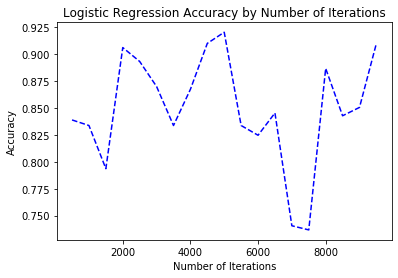

In [81]:
num_itt = []
accuracies = []
max_acc = 0
max_itt = 0
for x in np.arange(500, 10000, 500):
    acc, temp = k3.k_fold_validation(X_train_clean, y_train, 0.24, x, 0.9)
    num_itt.append(x)
    accuracies.append(acc)
    if(acc > max_acc):
        max_acc = acc
        max_itt = x
print(max_acc, max_itt)
plt.plot(num_itt,accuracies,'b--')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy by Number of Iterations')
plt.show()

In [ ]:
k_val = []
accuracies_nb = []
accuracies_l = []
max_acc_nb = 0
max_k_nb = 0
max_acc_l = 0
max_k_l = 0
for x in np.arange(2, 20, 1):
    acc_l, acc_nb = k3.k_fold_validation(X_train_clean, y_train, 0.24, 6500, 0.9, x)
    k_val.append(x)
    accuracies_l.append(acc_l)
    accuracies_nb.append(acc_nb)
    if(acc_l > max_acc_l):
        max_acc_l = acc_l
        max_k_l = x
    if(acc_nb > max_acc_nb):
        max_acc_nb = acc_nb
        max_k_nb = x
print(max_acc_l, max_k_l, max_acc_nb, max_k_nb)
plt.plot(k_val,accuracies_l,'b--')
plt.plot(k_val,accuracies_nb,'bs')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Model Accuracies by K Values')
plt.legend(['Logistic', 'Naive Bayes'])
plt.show()